# Regression

In this notebook, we will look at some different regression techniques using the Hitters dataset - we attempt to predict the salary of a baseball player from their performance on the field!

In [99]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [100]:
#importing, dropping NaNs, removing name variables, one-hot-encoding, etc.
df = pd.read_csv('Hitters.csv')
df = pd.read_csv('Hitters.csv').dropna().drop(df.columns[0], axis = 1)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df.Salary
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [101]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

## Ordinary least squares regression (OLS)

In [102]:
ols = LinearRegression()
ols.fit(X_train, y_train)

print("r^2 on train data is {}".format(ols.score(X_train, y_train)))
print("r^2 on test data is {}".format(ols.score(X_test, y_test)))

r^2 on train data is 0.566544619704869
r^2 on test data is 0.4003457419200568


The model is not fantastic and also there's some overfitting going on.

Intercept: 525.7213868883011


Text(0, 0.5, 'Feature')

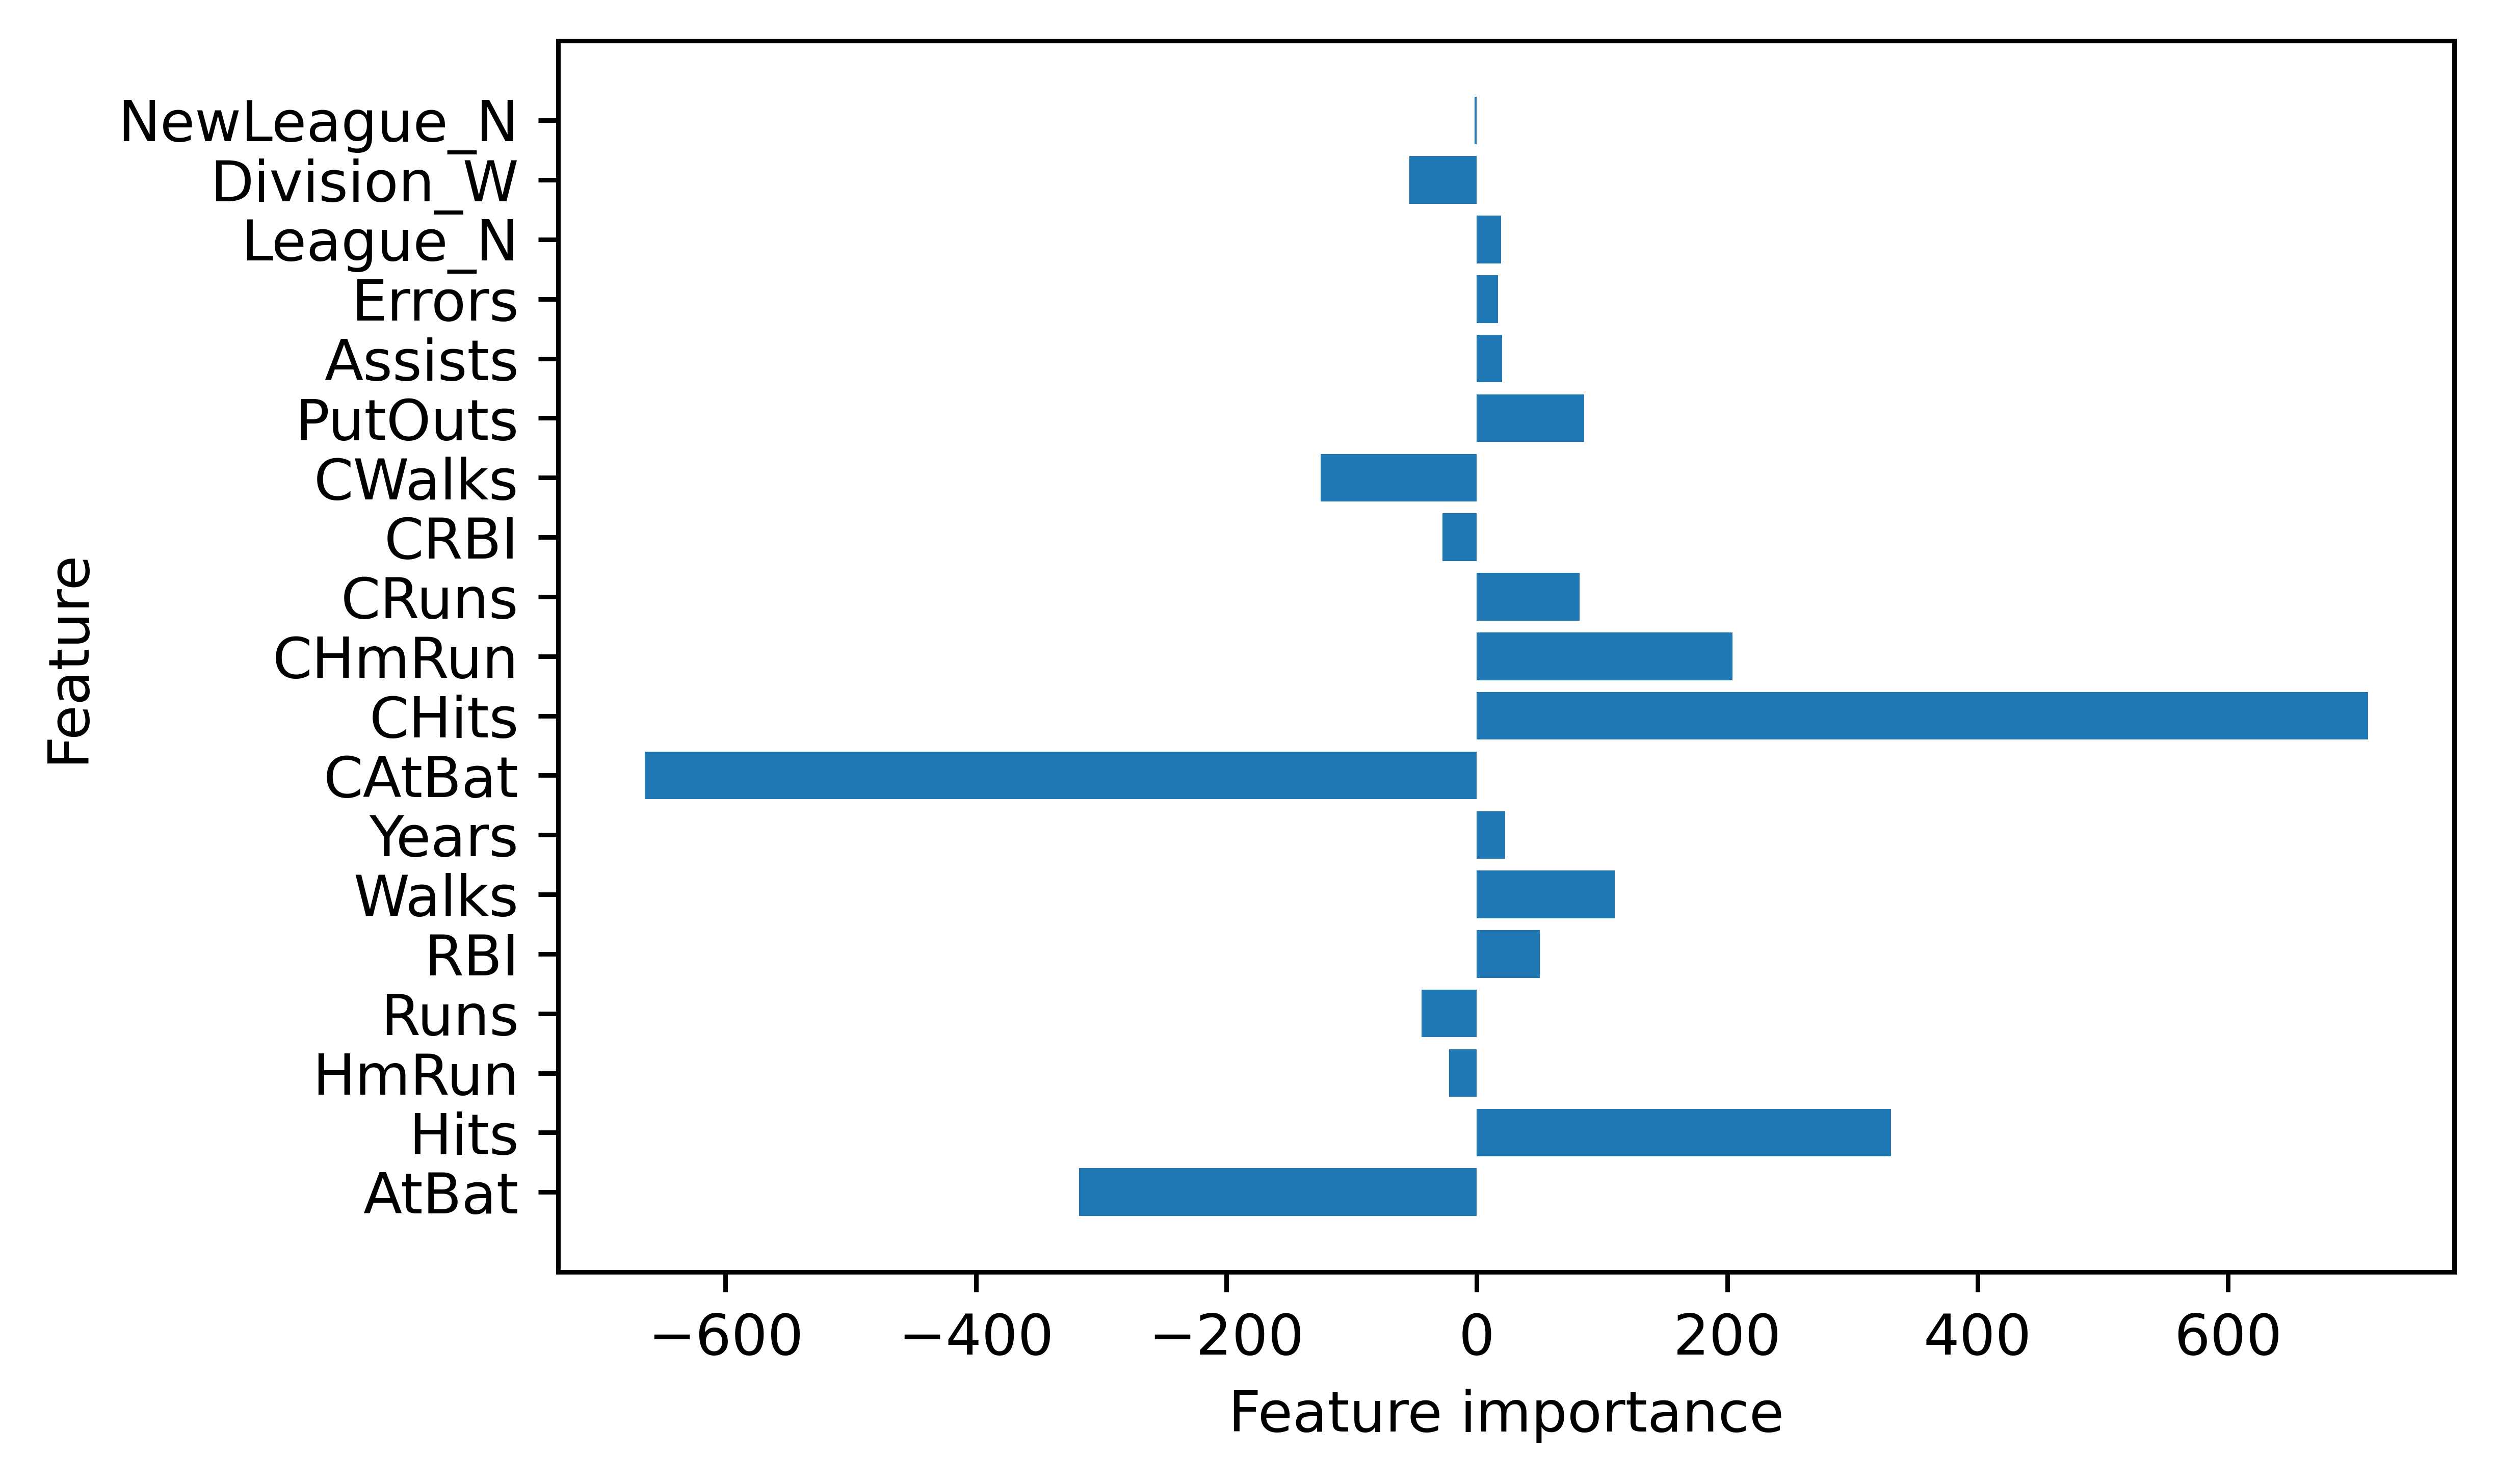

In [103]:
print("Intercept: {}".format(ols.intercept_))

n_features = len(ols.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), ols.coef_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

This figure allows us to extract the most important features for salary.

## Ridge regression

We can use cross-validation to get a good value for alpha:

In [104]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

2.320794416806386

In [125]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("r^2 on train data is {}".format(ridge.score(X_train, y_train)))
print("r^2 on test data is {}".format(ridge.score(X_test, y_test)))

r^2 on train data is 0.5560470397547166
r^2 on test data is 0.42486493383882074


It's not a huge improvement, but it is indeed an improvement and there's a little less overfitting than OLS. Increasing alpha will decrease r^2 a bit, but get the two closer to each other.

Intercept: 532.2558256979356


Text(0, 0.5, 'Feature')

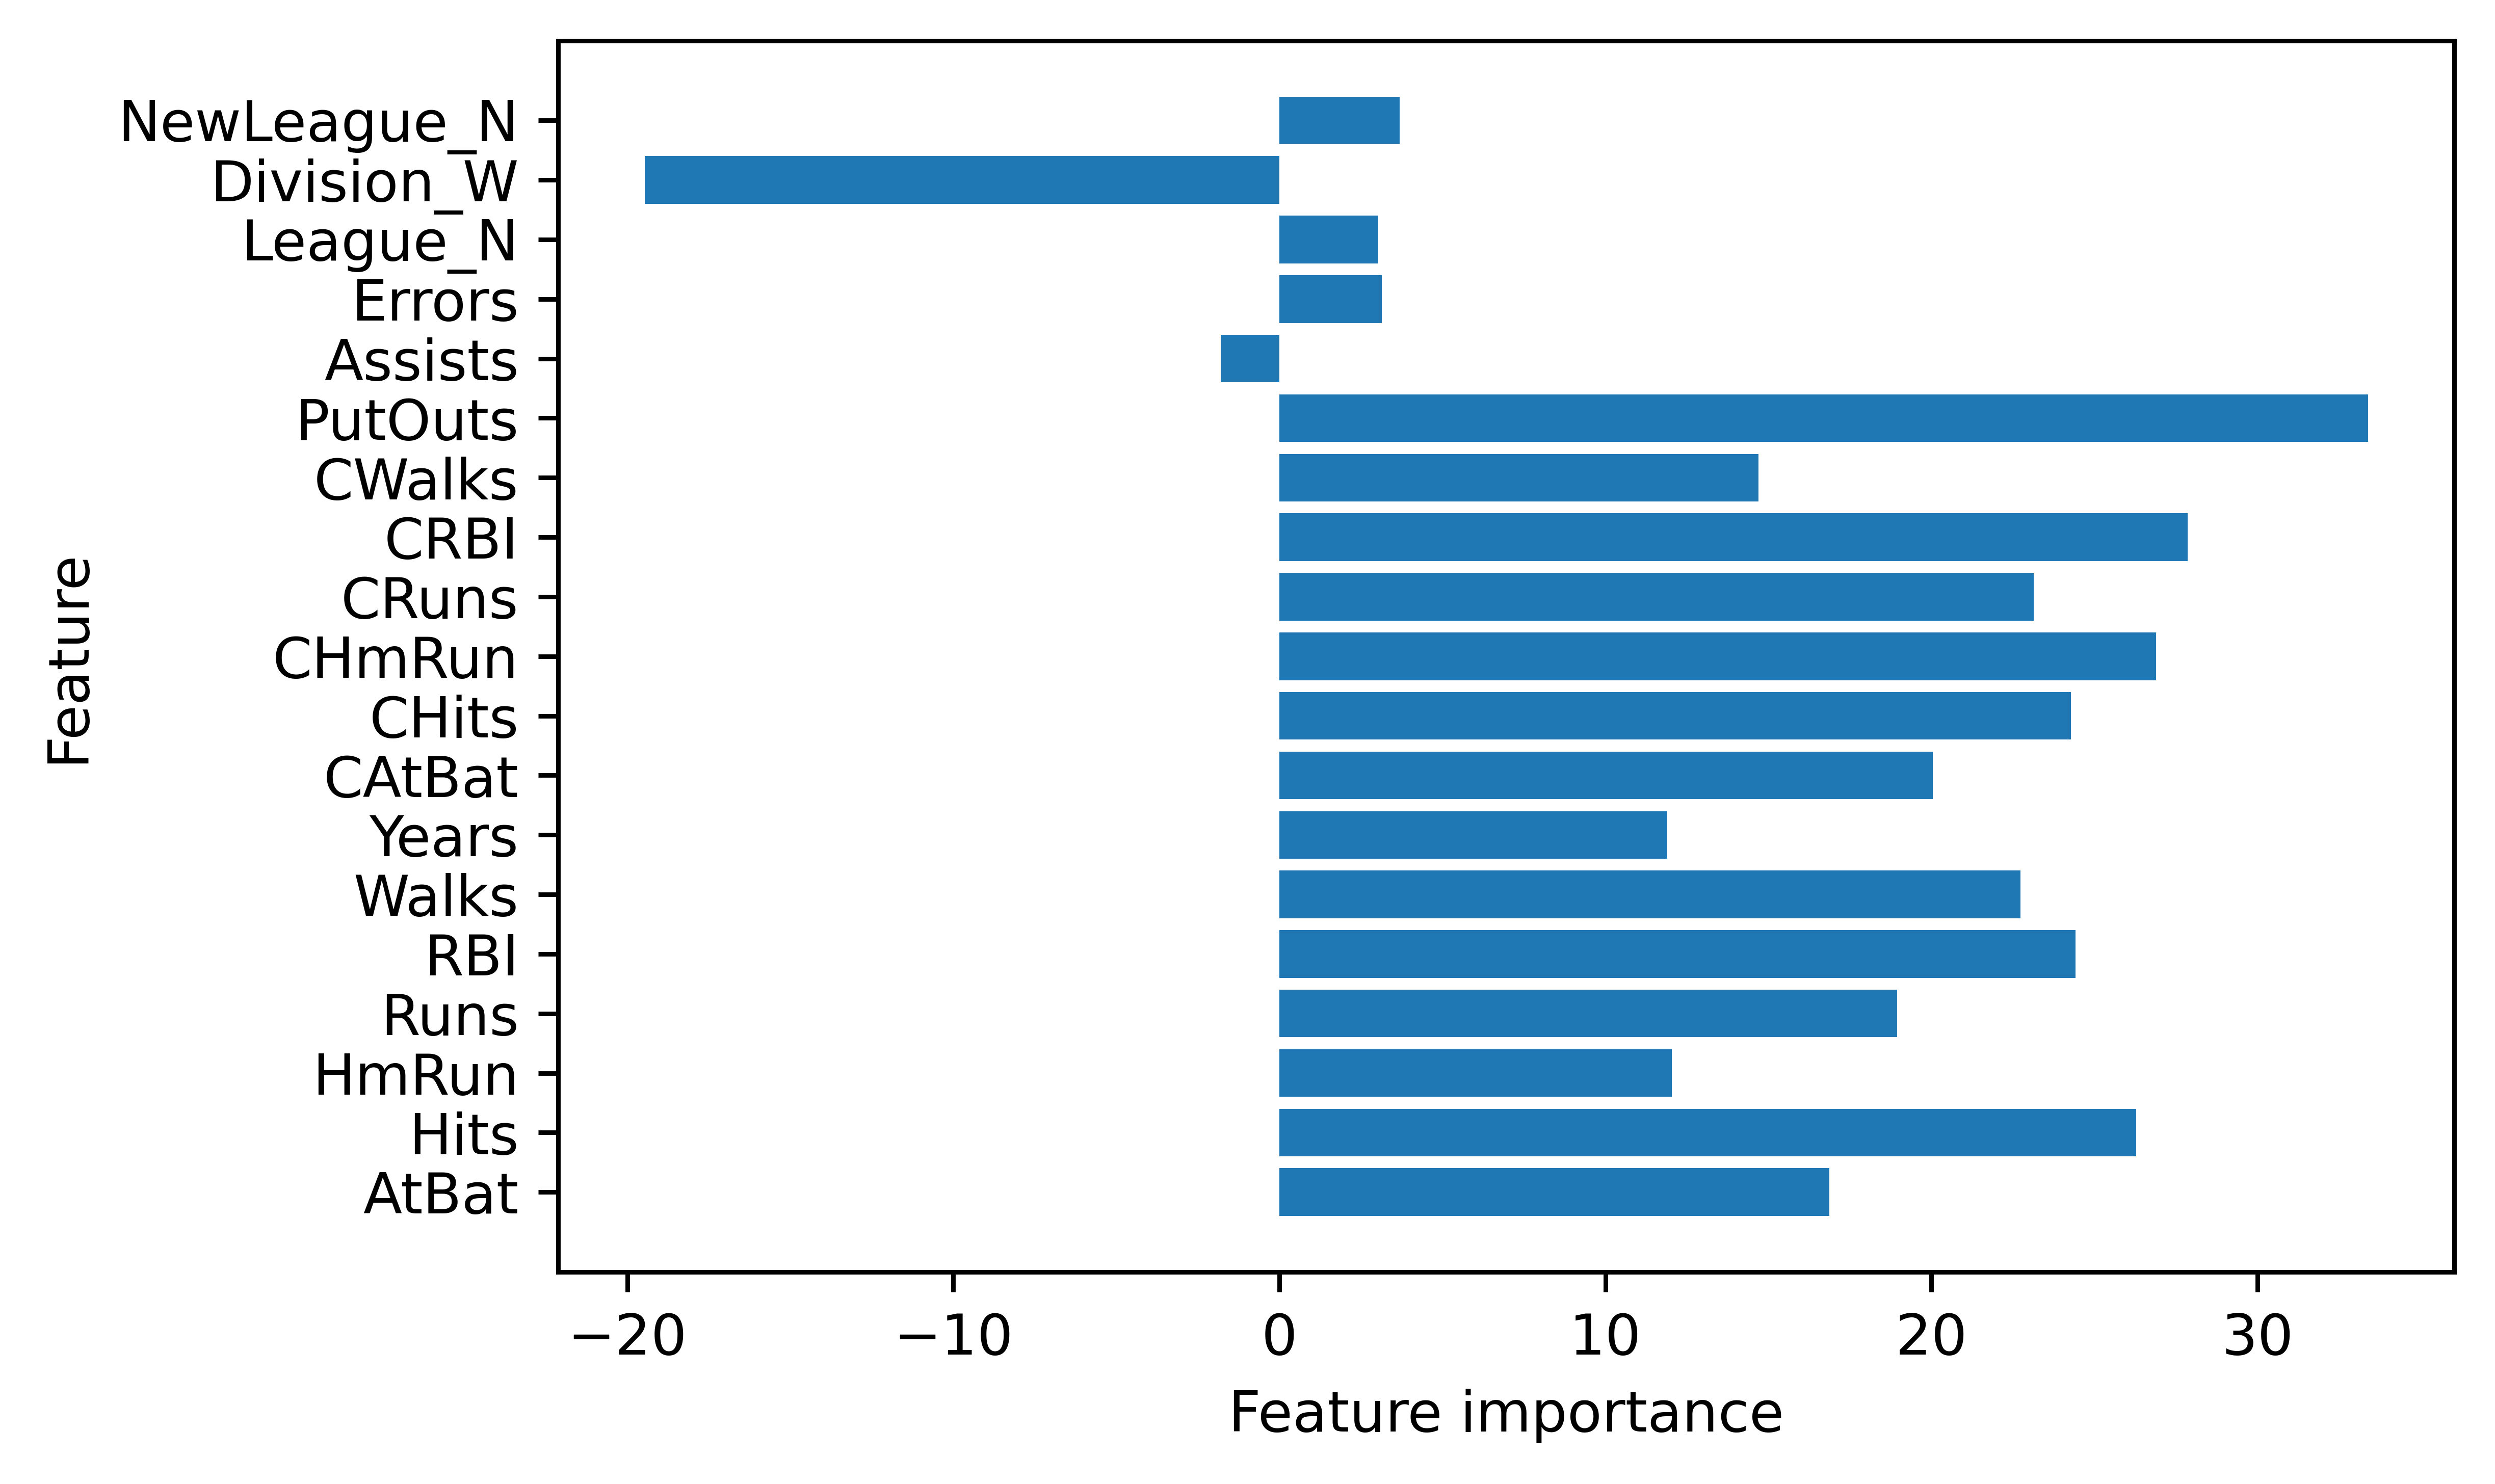

In [122]:
print("Intercept: {}".format(ridge.intercept_))

n_features = len(ridge.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), ridge.coef_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Notice that the coefficients are much smaller than for OLS - that's what Ridge regression can do!

## Lasso regression

In [123]:
lassocv = LassoCV(alphas = alphas, max_iter = 100000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

16.372745814388658

In [124]:
lasso = Lasso(alpha = lassocv.alpha_, max_iter = 100000)
lasso.fit(X_train, y_train)
print("r^2 on train data is {}".format(lasso.score(X_train, y_train)))
print("r^2 on test data is {}".format(lasso.score(X_test, y_test)))

r^2 on train data is 0.4946873629228874
r^2 on test data is 0.4099025702899163


A similar r^2 to OLS for the test data, but the two values are much closer to each other - less overfitting!

Intercept: 532.7242979154762


Text(0, 0.5, 'Feature')

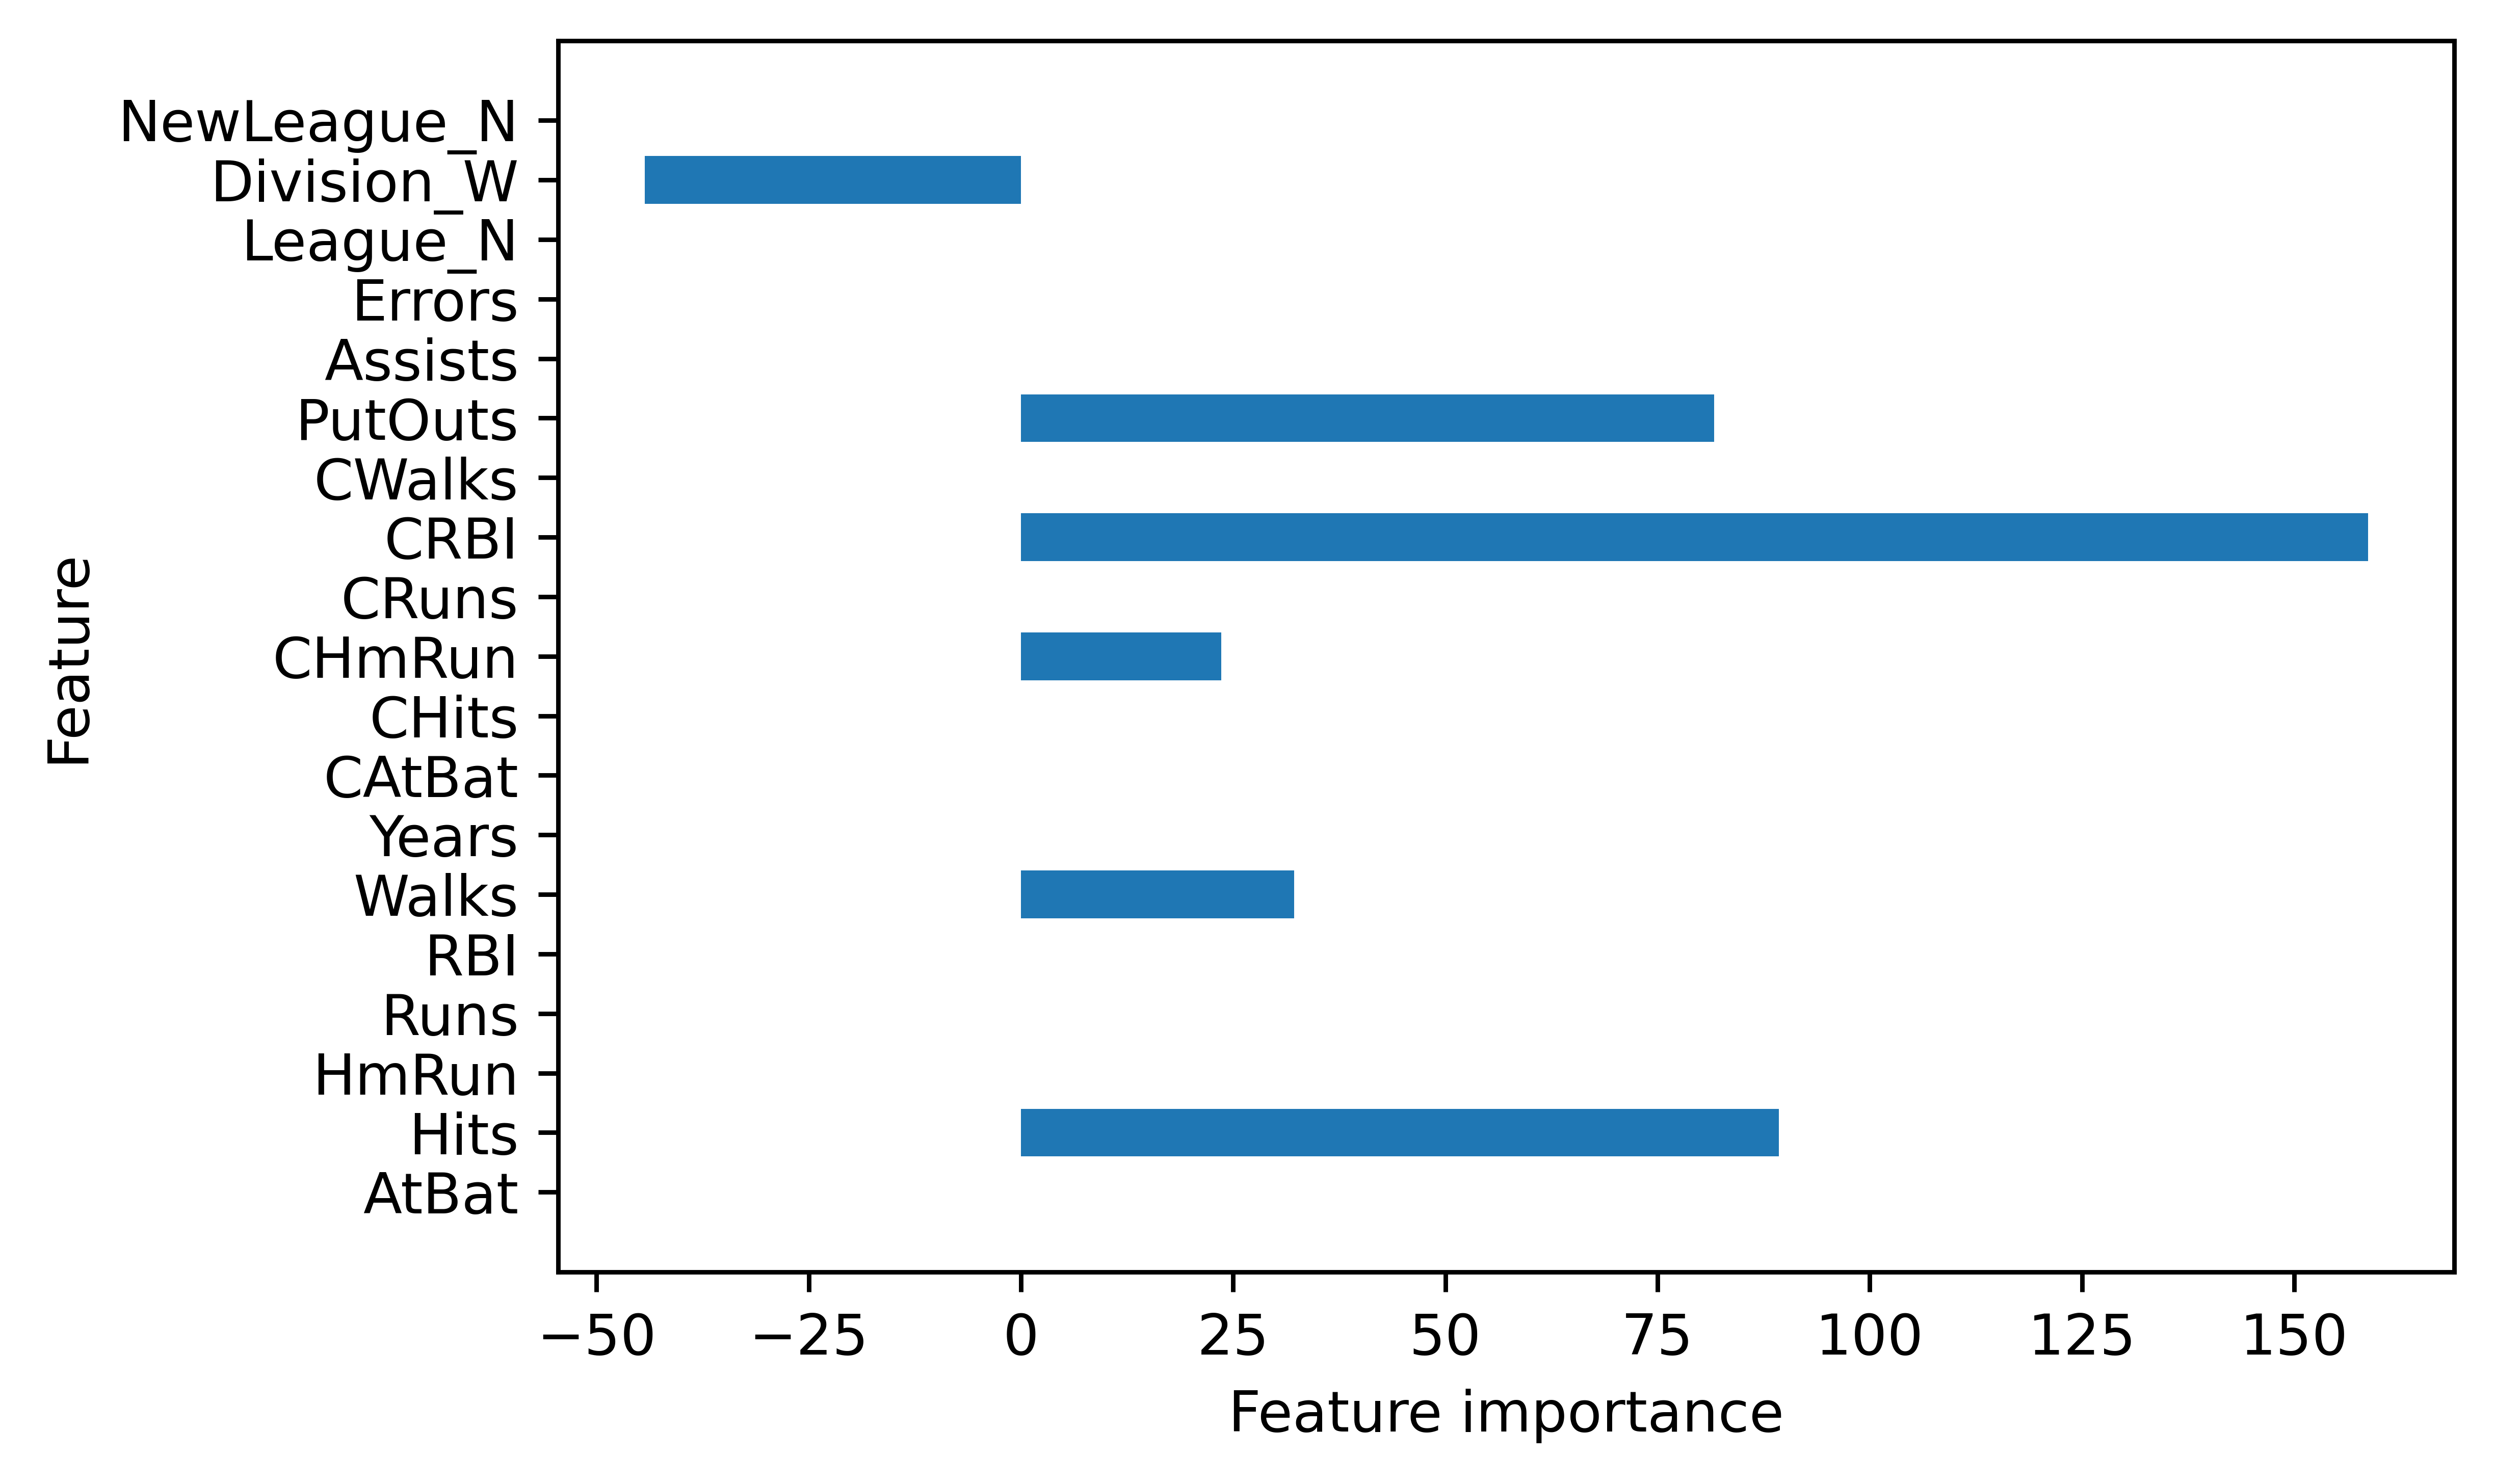

In [127]:
print("Intercept: {}".format(lasso.intercept_))

n_features = len(lasso.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), lasso.coef_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Behold the power of Lasso regression: Several coefficients are exactly zero!